In [2]:
# a trial case to load data into Python
import pandas as pd
from pandas.core.computation.check import NUMEXPR_INSTALLED

#file_path = ".././studies/TN_01/TrialNet_01_Data/TN01_ADVERSEEVENTS.CSV"
file_path = "/home/ec2-user/SageMaker/studies/TN_19/TrialNet_19_Data/TN19_VISITASSESSMENT.CSV"

df1 = pd.read_csv(file_path)
df1.head()

,MaskID,Visit_Dt,Visit,AnthopometricsWeightKg,AnthopometricsWeightNotDone,AnthopometricsHeightCM,AnthopometricsHeightNotDone,SeatedArmBloodPressureSystolic,SeatedArmBloodPressureDiastoli,SeatedArmBloodPressureNotDone,...,NeurologicFindings,OtherFindings,BreastFemaleTannerStage,GenitailiaMaleTannerStage,PubicHairTannerStage,ReproductiveChildbearingPotent,UrinePregnancyTest,UrinePregnancyTestPositive,PlanPregnantWithinNextYear,BirthControlAbstinenceAcceptab
0,204470,10/07/2015,2 weeks,42.1,NaN,155.4,NaN,123.0,65.0,NaN,...,Normal,Not Assessed,NaN,NaN,NaN,Yes,Yes,No,No,No
1,204470,10/20/2015,4 weeks,40.9,NaN,154.8,NaN,106.0,65.0,NaN,...,Normal,Not Assessed,NaN,NaN,NaN,Yes,Yes,No,No,No
2,204470,11/04/2015,6 weeks,40.9,NaN,154.8,NaN,106.0,66.0,NaN,...,Normal,Not Assessed,NaN,NaN,NaN,Yes,Yes,No,No,No
3,204470,11/20/2015,8 weeks,42.2,NaN,154.6,NaN,114.0,61.0,NaN,...,Normal,Not Assessed,NaN,NaN,NaN,Yes,Yes,No,No,Yes
4,204470,12/02/2015,10 weeks,43.0,NaN,156.3,NaN,124.0,59.0,NaN,...,Normal,Not Assessed,NaN,NaN,NaN,Yes,Yes,No,No,Yes


# 1. TN_19

## 1.1 Check column headers of all data files

In [15]:
# check column headers for all data files
import pandas as pd
import os

# Directory containing the CSV files
#directory = ".././studies/TN_01/TrialNet_01_Data"
directory = "/home/ec2-user/SageMaker/studies/TN_19/TrialNet_19_Data/"

# List to store (file name, column header) tuples
headers_list = []

# Iterate through each CSV file in the directory
for file in os.listdir(directory):
    if file.endswith('.csv'):
        file_path = os.path.join(directory, file)
        try:
            with open(file_path, 'r', encoding='latin1') as f:  # change encoding here
                headers = f.readline().strip().split(',')
                headers_list.extend([(file, header) for header in headers])
        except UnicodeDecodeError as e:
            print(f"Error reading file {file}: {e}")

# Create a DataFrame from the headers list
headers_df = pd.DataFrame(headers_list, columns=['File Name', 'Column Header'])

# Group by 'Column Header' and count the occurrences
header_counts = headers_df['Column Header'].value_counts().reset_index()
header_counts.columns = ['Column Header', 'Header Count']

# Merge the count back into the original DataFrame
headers_df = headers_df.merge(header_counts, on='Column Header')

# Sort the DataFrame by the column header
headers_df = headers_df.sort_values(by='Header Count', ascending=False)

# Display the DataFrame
print(headers_df.info())
headers_df.head(50)

<class 'pandas.core.frame.DataFrame'>
Index: 979 entries, 0 to 978
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   File Name      979 non-null    object
 1   Column Header  979 non-null    object
 2   Header Count   979 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 30.6+ KB
None


,File Name,Column Header,Header Count
0,TN19_ADVERSEEVENTS.CSV,MaskID,24
13,TN19_PARTICIPANTSITETRANSFER.CSV,MaskID,24
23,TN19_VISITASSESSMENT.CSV,MaskID,24
1,TN19_BASELINEELIGIBILITY.CSV,MaskID,24
21,TN19_TREATMENTSTARTDATE.CSV,MaskID,24
20,TN19_STUDYDRUGADMINISTRATION.CSV,MaskID,24
19,TN19_SCREENINGVISITASSESSMENT.CSV,MaskID,24
18,TN19_SCREENINGELIGIBILITY.CSV,MaskID,24
17,TN19_RESEARCHLABS.CSV,MaskID,24
16,TN19_REGISTRATION.CSV,MaskID,24


In [16]:
# Specify the desired file name for the CSV, and save the header list to the current working directory
csv_file_name = 'TN_19_column_headers.csv'
headers_df.to_csv(csv_file_name, index=False)

## 1.2 Merging data files 

Because of the concern over the data size to be merged. We divided the total 31 files into 2 parts, merged them separately and then joined them together (if possible). Here are rules for data merging. 1). Outer join based on all shared columns. 2).

In [1]:
import pandas as pd
from pandas.core.computation.check import NUMEXPR_INSTALLED
import glob
import os

def merge_csv_files(file_list):
    # Initialize an empty list to store DataFrames
    dataframes = []

    for file in file_list:
        # Read the CSV file, converting all data to strings
        df = pd.read_csv(file, dtype=str, encoding='latin1')
        dataframes.append(df)

    # Find common headers among all DataFrames
    common_headers = set.intersection(*[set(df.columns) for df in dataframes])

    # Merge all DataFrames on common headers using outer join
    # Initialize merged DataFrame with the first DataFrame in the list
    merged_df = dataframes[0]

    for idx, df in enumerate(dataframes[1:], start=1):
        # Specify unique suffixes to avoid column name conflicts
        suffix = f'_dup{idx}'
        merged_df = pd.merge(merged_df, df, on=list(common_headers), how='outer', suffixes=('', suffix))

    # Drop columns that are completely duplicated
    merged_df = merged_df.loc[:,~merged_df.columns.duplicated()]

    return merged_df

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# List all CSV files in the folder
directory = "/home/ec2-user/SageMaker/studies/TN_19/TrialNet_19_Data/"
csv_files = glob.glob(os.path.join(directory, '*.CSV'))

# Split the list into * parts
#merge data files of the first part
first_part_files = csv_files[:15]
merged_first_part = merge_csv_files(first_part_files)

#save the first merged dataset
merge_data_name_1 = 'TN_19_merged_data_1.csv'
merged_first_part.to_csv(merge_data_name_1, index=False)

print(merged_first_part.info())
merged_first_part.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Columns: 307 entries, MaskID to HadComplicationOfPreg
dtypes: object(307)
memory usage: 7.5+ MB
None


,MaskID,Visit_Dt,AEInitialAEID,adverse_event_id,aedate,aereportdt,AE_Submitted,AEPrimarySecondary,AECategory,AETerm,...,DoLMCDay,DoLMCYear,DoDeliveryMonth,DoDeliveryDay,DoDeliveryYear,ParticipantCarryingPregnancyTo,WillingToContinueFUVisits,ParticpantsObCareProviderInfor,PriorPregnancyNumberUnkown,HadComplicationOfPreg
0,204470,09/23/2015,426,426,09/23/2015,09/23/2015,11/10/2015,Primary,Immune system disorders,Cytokine release syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,204470,09/24/2015,429,429,09/24/2015,09/24/2015,11/10/2015,Primary,Investigations,Lymphocyte count decreased,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,204470,09/26/2015,427,427,09/26/2015,09/27/2015,11/10/2015,Primary,Nervous system disorders,Headache,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,204470,10/06/2015,428,428,10/06/2015,10/06/2015,11/10/2015,Primary,Immune system disorders,Serum sickness,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,204470,10/20/2015,430,430,10/20/2015,10/20/2015,11/10/2015,Primary,Investigations,CD4 lymphocytes decreased,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#merge data files of the second part
second_part_files = csv_files[15:]
merged_second_part = merge_csv_files(second_part_files)

#save the second merged dataset
merge_data_name_2 = 'TN_19_merged_data_2.csv'
merged_second_part.to_csv(merge_data_name_2, index=False)

print(merged_second_part.info())
merged_second_part.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20361 entries, 0 to 20360
Columns: 628 entries, MaskID to BirthControlAbstinenceAcceptab
dtypes: object(628)
memory usage: 97.6+ MB
None


,MaskID,Visit_Dt,Visit,DateProtocolDeviationDay,DateProtocolDeviationMonth,DateProtocolDeviationYear,VisitProtocolDeviationOccurred,ProtocolDeviationReasons,SampleOutsideWindow_HbA1c,SampleOutsideWindow_CBCwdifferen,...,NeurologicFindings_dup8,OtherFindings_dup8,BreastFemaleTannerStage,GenitailiaMaleTannerStage,PubicHairTannerStage,ReproductiveChildbearingPotent_dup8,UrinePregnancyTest_dup8,UrinePregnancyTestPositive_dup8,PlanPregnantWithinNextYear,BirthControlAbstinenceAcceptab
0,204470,08/31/2017,PRN,31,Aug,2017,Visit 11 (Week 96),Required sample(s) not collected (check all th...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,204470,08/31/2017,PRN,31,Aug,2017,Visit 11 (Week 96),Required sample(s) not collected (check all th...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,204470,08/31/2017,PRN,31,Aug,2017,Visit 11 (Week 96),Required sample(s) not collected (check all th...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,204470,08/31/2017,PRN,31,Aug,2017,Visit 11 (Week 96),Required sample(s) not collected (check all th...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,204470,08/31/2017,PRN,31,Aug,2017,Visit 11 (Week 96),Required sample(s) not collected (check all th...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import numpy as np

# Load the CSV files
#merged_first_part = pd.read_csv('TN_01_merged_data_1.csv')
#merged_second_part = pd.read_csv('TN_01_merged_data_2.csv')
#merged_third_part = pd.read_csv('TN_01_merged_data_3.csv')
merged_first_part.replace("nan", np.nan, inplace=True)
merged_second_part.replace("nan", np.nan, inplace=True)
#merged_third_part.replace("nan", np.nan, inplace=True)

# Function to clean a DataFrame
def clean_dataframe(df):
    # Drop columns where all values are missing
    df = df.dropna(axis=1, how='all')
    # Remove duplicated rows
    df = df.drop_duplicates()
    return df

# Clean each DataFrame
merged_first_part = clean_dataframe(merged_first_part)
merged_second_part = clean_dataframe(merged_second_part)
#merged_third_part = clean_dataframe(merged_third_part)


#save to the working folder
merged_first_part.to_csv('TN_19_merged_data_1.csv', index=False)
merged_second_part.to_csv('TN_19_merged_data_2.csv', index=False)
#merged_third_part.to_csv('TN_01_merged_data_3.csv', index=False)

In [5]:
#merge the last two merged datasets into one
common_headers = set.intersection(set(merged_second_part.columns), set(merged_first_part.columns))

# Merge the first two DataFrames on common headers using outer join
merged_data = pd.merge(merged_second_part, merged_first_part, on=list(common_headers), how='outer', 
                            suffixes=('_dupl_x', '_dupl_y'))

#save the merged dataset into working folder
merged_data.to_csv('TN_19_merged_data.csv', index=False)

In [6]:
#remove the merged datasets to save space
!rm TN_19_merged_data_1.csv
!rm TN_19_merged_data_2.csv

## 1.3 Overview of the merged dataset

Since we cannot get one merged data for the analysis, we are not working on both merged dataset separately.

In [1]:
# The following code is to merge the two datasets for TN_01, but will cause error or dead kernel. 
import pandas as pd
from pandas.core.computation.check import NUMEXPR_INSTALLED
import warnings
warnings.filterwarnings('ignore')


merged_data = pd.read_csv('TN_19_merged_data.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### 1.3.1 summary of the first merged dataset

In [7]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23514 entries, 0 to 23513
Columns: 875 entries, MaskID to HadComplicationOfPreg
dtypes: object(875)
memory usage: 157.0+ MB


In [8]:
# check missing value percentage, most commonly observed values (top 5) and their value counts of merge_first_part
import pandas as pd

# Calculate the percentage of missing values
missing_percentage = merged_data.isnull().mean() * 100

# Initialize a list to hold the data for the new DataFrame
data = []

# Iterate through each column in the original DataFrame
for column in merged_data.columns:
    # Find the top 5 most frequent values (excluding NaN) and their counts
    top_5_values_counts = merged_data[column].value_counts(dropna=True).head(5)
    top_5_values = top_5_values_counts.index.tolist()
    top_5_counts = top_5_values_counts.tolist()

    # Ensure the lists have 5 elements by padding with None if necessary
    top_5_values += [None] * (5 - len(top_5_values))
    top_5_counts += [None] * (5 - len(top_5_counts))

    # Determine the data type of the column
    column_dtype = str(merged_data[column].dtype)

    # Append the data for this column to the list
    data.append([missing_percentage[column], column_dtype] + top_5_values + top_5_counts)

# Define the columns for the new DataFrame
columns = ['Missing Percentage', 'Value Type', 
           'Top 1', 'Top 2', 'Top 3', 'Top 4', 'Top 5',
           'Top 1 Value Count', 'Top 2 Value Count', 'Top 3 Value Count', 
           'Top 4 Value Count', 'Top 5 Value Count']

# Create the new DataFrame
summary_df = pd.DataFrame(data, index=merged_data.columns, columns=columns)

# Sort the DataFrame by 'Missing Percentage' in descending order
summary_df = summary_df.sort_values(by='Missing Percentage', ascending=False)

# Save the DataFrame to a CSV file
summary_df.to_csv('TN_19_merged_data_summary.csv')

##### Among 875 headers of all recorded headers, 580 of them have over 99% of missing values; 96 of them have 95% - 99% missing values; 165 have 50% - 95% missing values; the rest 34 have less than 50% of missing values. Here are a few suggestions for further analyses.

1). drop those collumes with little little values, such as those with missing values larger than 99%.

2). change to another instance with higher memory.

3). merge some columns together based on their similarity.

In [3]:
!pip install missingno

<Axes: >

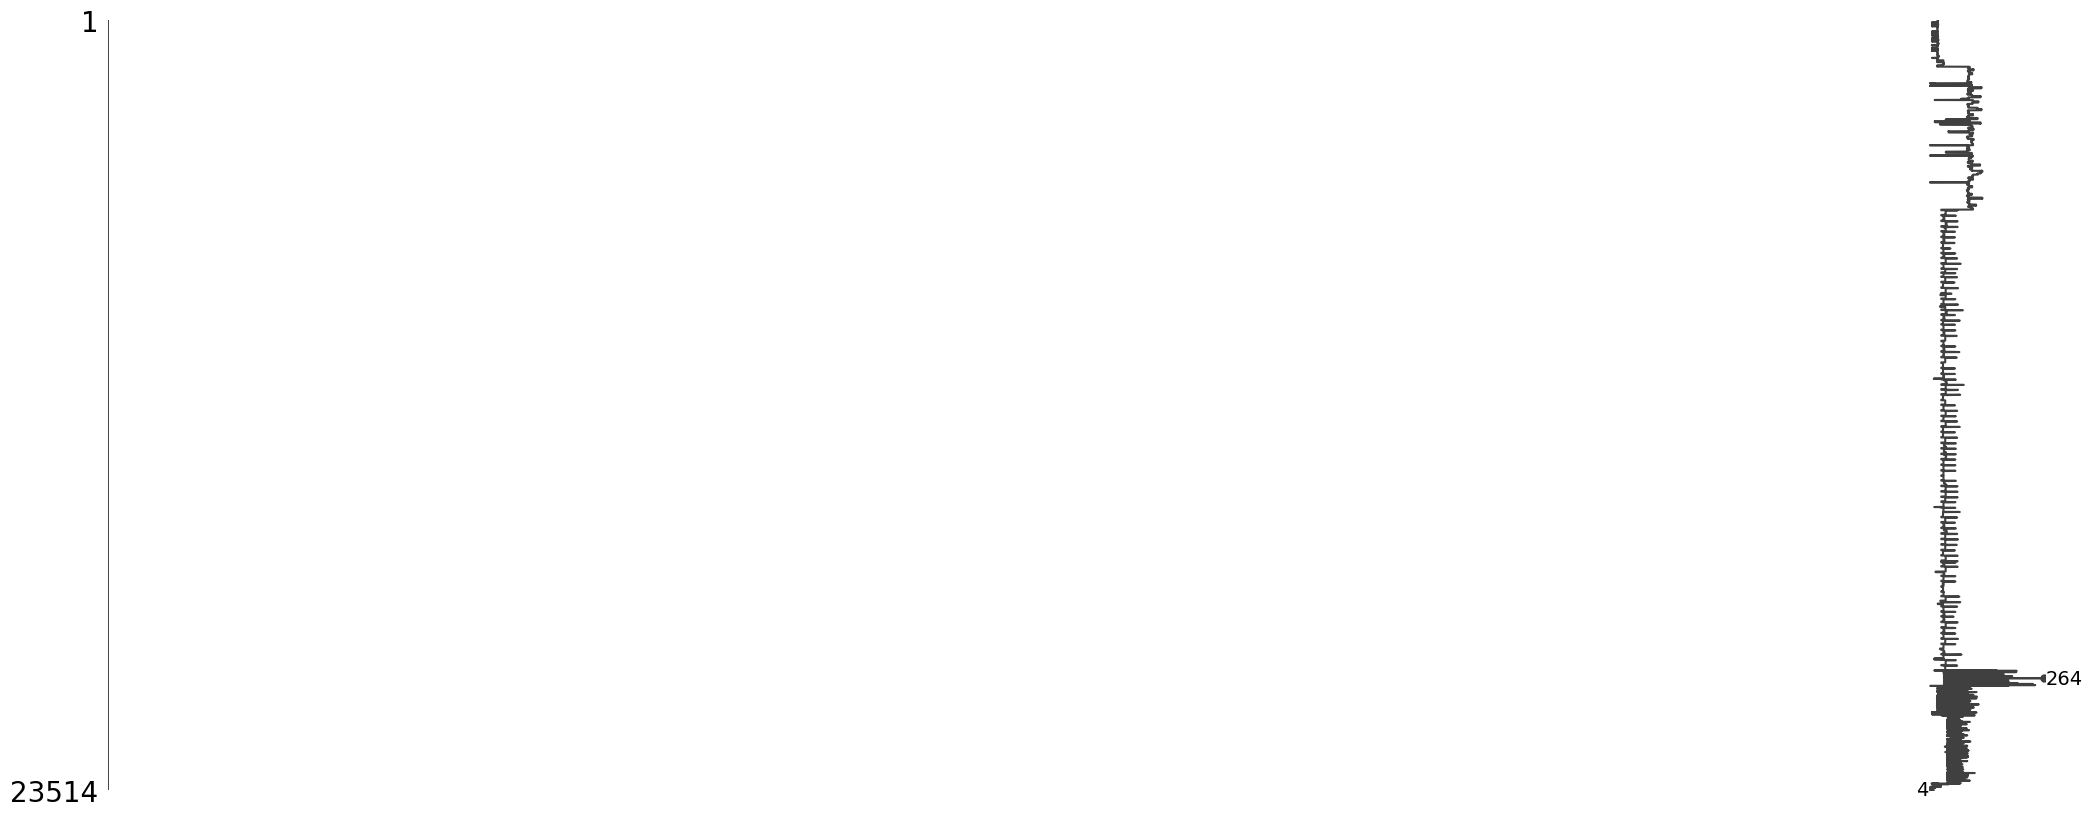

In [9]:
#Not a good way to plot missing value percentage using msno because of too many columns.
import missingno as msno

msno.matrix(merged_data)

##### for this part of data, there are 21 headers, and most of them with limited number of missing value percentage, compared with the other part of the data as discussed later.

In [ ]:
# the following function cannot be run for missing value visualization because of data size
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

merged_data.replace("nan", np.nan, inplace=True)
# Create a heatmap to visualize missing values
plt.figure(figsize=(12, 8))  # Adjust the size of the plot as needed
sns.heatmap(merged_data.isnull(), cbar=False, cmap='viridis')

# Add title and labels as needed
plt.title("Missing Data Visualization")
plt.xlabel("Columns")
plt.ylabel("Rows")

# Show the plot
plt.show()